In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [2]:
#Reading the datasets
df1 = pd.read_csv("/Users/chintanvaghela/Desktop/Data Science/Python/Movie Recommender System/TMDB ds/tmdb_5000_credits.csv")
df2 = pd.read_csv("/Users/chintanvaghela/Desktop/Data Science/Python/Movie Recommender System/TMDB ds/tmdb_5000_movies.csv")

In [3]:
df1.columns = ['id','tittle','cast','crew']
df2 = df2.merge(df1, on="id")

In [4]:
#Reading the first 5 rows of the dataset 1
df1.head()

,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
#Reading the first 5 rows of the dataset 2
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

# 1. Demographic Filtering

#### It provides generalized recommendations to every user, based on movie/content popularity and/or genre. The System recommends the same movies/content to users with similar demographic features. Since each user is different , this approach is considered to be "too simple". The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. 

#### For Demographoc filtering, we need to follow these steps:
 - Rate the movie/provide metrics
 - Calculate the score for every movie
 - Sort these scores and recommend the best movies to the users

We can also use the average ratings to rate the movies' scores, but it won't be a fair comparison since a movie with 8.9 average can sometimes only have <5 votes and can be considered a better movie than a movie with a 7.7 ratings with 50 votes. 
For this, we will be using IMDB's Weighted Average Ratings (WAR), which is given as:

Weighted Average Ratings (WAR) = (((v)/(v + m)) * R) + (((m) / (v + m) * C)

Where,

- v: number of votes for the movie
- m: minimum number of votes required to be listed in the charts
- R: Average rating of the movie
- C: Mean vote across the entire report

In [7]:
#Getting the "mean vote across report" for the dataset
C = df2["vote_average"].mean()
C

#The mean rating of all the movies is around 6/10

6.092171559442011

In [8]:
#Now we can find the value for "m"
#In other words, in order for the movie to be listed on the charts, it must have MORE votes than 90% of the movies listed on the list
m = df2["vote_count"].quantile(0.9)
m

#So the movies that have votes more than "m" are to be listed on the charts. We can filter out the movies that qualify

1838.4000000000015

In [9]:
#Separating the movies that qualify to meet the 0.9 quantile metric
q_movies = df2[df2["vote_count"] > m]
q_movies.shape

#We can see that 481 movies fit this criteria

(481, 23)

In [10]:
#Now we will define our metric to calculate the "weighted score" each movie scores from this qualified movies' list
def weighted_rating(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    
    #Plugging all these values in the weighted average equation
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
#Adding the weighted_score on the qualified movies' dataframe
q_movies["weighted_score"] = q_movies.apply(weighted_rating, axis=1)

In [12]:
q_movies.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew', 'weighted_score'],
      dtype='object')

In [13]:
#Sorting values by their vote count (since vote count is more important from a metrics perspective), and their 
#weighted average for
q_movies = q_movies[["id", "title", "vote_average", "vote_count", "weighted_score"]].sort_values(by = "weighted_score", ascending=False)
q_movies.head(10)

,id,title,vote_average,vote_count,weighted_score
1881,278,The Shawshank Redemption,8.5,8205,8.059258
662,550,Fight Club,8.3,9413,7.939256
65,155,The Dark Knight,8.2,12002,7.920020
3232,680,Pulp Fiction,8.3,8428,7.904645
96,27205,Inception,8.1,13752,7.863239
3337,238,The Godfather,8.4,5893,7.851236
95,157336,Interstellar,8.1,10867,7.809479
809,13,Forrest Gump,8.2,7927,7.803188
329,122,The Lord of the Rings: The Return of the King,8.1,8064,7.727243
1990,1891,The Empire Strikes Back,8.2,5879,7.697884


This should conclude our Demographic filtering recommender system. However, many streaming services also offer "Trending Now" movies and TV shows that pop up on your home screen, which can be obtained using the "popularity" column of our dataset.

In [14]:
#Trending Now movies/TV shows
trending = df2[["id", "title", "vote_average", "vote_count", "popularity"]].sort_values(by = "popularity", ascending=False).head(10)
trending

,id,title,vote_average,vote_count,popularity
546,211672,Minions,6.4,4571,875.581305
95,157336,Interstellar,8.1,10867,724.247784
788,293660,Deadpool,7.4,10995,514.569956
94,118340,Guardians of the Galaxy,7.9,9742,481.098624
127,76341,Mad Max: Fury Road,7.2,9427,434.278564
28,135397,Jurassic World,6.5,8662,418.708552
199,22,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,271.972889
82,119450,Dawn of the Planet of the Apes,7.3,4410,243.791743
200,131631,The Hunger Games: Mockingjay - Part 1,6.6,5584,206.227151
88,177572,Big Hero 6,7.8,6135,203.734590


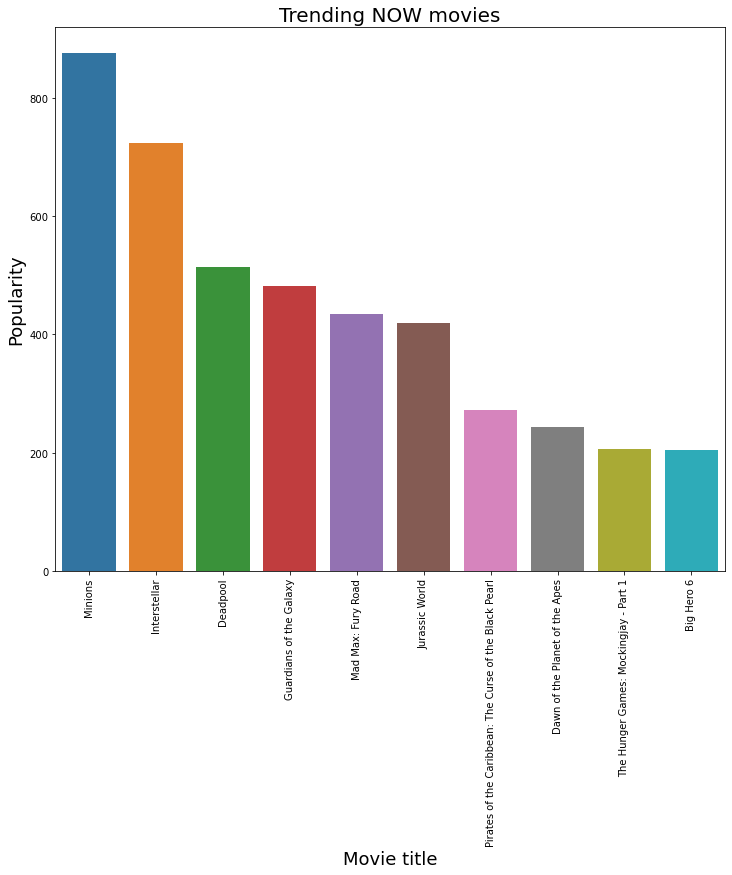

In [15]:
#Plotting the "Trending  Now" movies
plt.figure(figsize = (12,10))
sns.barplot(data=trending, x="title", y="popularity")
plt.xticks(rotation=90) 
plt.title("Trending NOW movies", size =20)
plt.ylabel("Popularity", size = 18)
plt.xlabel("Movie title", size = 18);

#### NOTE:
 - These demographic recommender systems provide a general chart of recommended movies to ALL the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system - Content Basesd Filtering.

# 2. Content-Based Filtering

#### This type of recommender system suggest "similar" products/content based on the similarity of a particular product/content. It uses the metadata, such as genre, director, description, actors, etc. for movies to make these recommendations. Precisely, the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.
#### The general idea behind this recommender system is that if a user liked a particular product, they will also like another item that is "similar" to it.

### Plot description based recommender
##### We will plot pairwise similarity scores for all movies based on their plots and descriptions and recommend movies based on their similarity score. The "description" of the plot is given in the "overview" column of the dataset. Let's take a look at the column

In [16]:
#Viewing the first few lines of the column
df2["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

- For text processing, we'll have to convert the word vector for each overview. We'll compute the Term Frequency - Inverse Document Frequency (TF-IDF) vectors for each overview.
- Term Frequency (TF): it is the relative frequency of a SPECIFIC word in a document/sentence and is given as (term instances/total instances) OR (number of word repetition/total words in the sentence/document)
- Inverse-Document Frequency (IDF): it is the relative count of documents containing the term. It is given as log(number of documents/documents with term).
- TF * IDF is the overall importance of each word to the documents in which they appear.

- It provides us a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [17]:
#Importing TF-IDF Vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

#Defining an object value "tfidf"
#Removing all the English stop words from the object, such as "the", "a", "an", etc.
tfidf = TfidfVectorizer(stop_words = "english")

#Replacing all the null values from the "overview" column
df2["overview"] = df2["overview"].fillna("")

#Construvting the matrix by fitting and transforming the data with TF-IDF vectorizer
tfidf_matrix = tfidf.fit_transform(df2["overview"])

In [18]:
tfidf_matrix.shape

#We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

(4803, 20978)

With this matrix in hand, we can now compute a similarity score. There are several approaches for this; such as the Euclidean, the Pearson and the cosine similarity scores. There is no right answer or wrong answer to which scoring method/metric is the best. 

Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

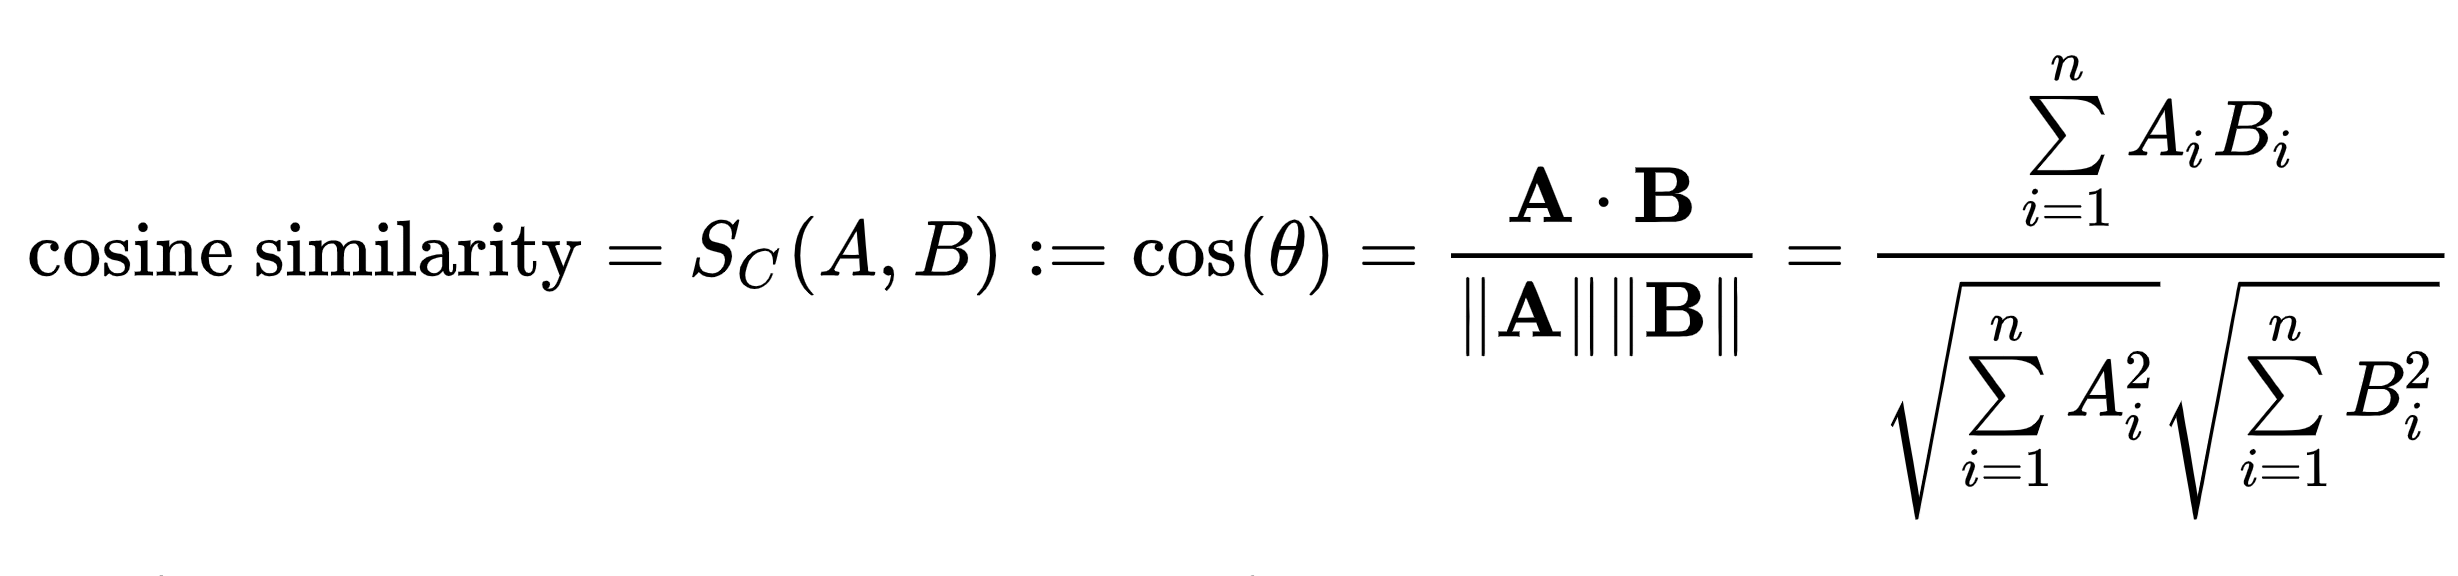

Cosine Similarity is a measurement that quantifies the similarity between two or more vectors. The cosine similarity is the cosine of the angle between vectors. The vectors are typically non-zero and are within an inner product space.

#### Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [19]:
#Importing linear_kernel
from sklearn.metrics.pairwise import linear_kernel

#Computing the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

##### Now, we need to build a function that provides us top 10 "best matching" (similar) movies to the movie defined in the input function. 

To do this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [20]:
#Constructing a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [21]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

##### Nect steps to follow:

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [22]:
#Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim = cosine_sim):
    
    #Get the index of that respective movie that matches the title
    idx = indices[title]
    
    #Get the pairwise similarity score for all movies with that movie
    # sim_scores returns (index, cosine_sim)
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sorting the movies based on their similarity scores
    #Returns (index, cosine_sim)
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    #Getting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Getting the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #Returning the top 10 similar movies
    return pd.DataFrame(df2['title'].iloc[movie_indices])

In [23]:
get_recommendations("Toy Story")

,title
42,Toy Story 3
343,Toy Story 2
1779,The 40 Year Old Virgin
2869,For Your Consideration
891,Man on the Moon
3873,Class of 1984
3379,Factory Girl
3065,Heartbeeps
3383,Losin' It
2569,Match Point


def total(a, b):
    return a + b

lambda x, y: x + y

In [24]:
get_recommendations("The Avengers")

,title
7,Avengers: Age of Ultron
3144,Plastic
1715,Timecop
4124,This Thing of Ours
3311,Thank You for Smoking
3033,The Corruptor
588,Wall Street: Money Never Sleeps
2136,Team America: World Police
1468,The Fountain
1286,Snowpiercer


In [25]:
get_recommendations("Titanic")

,title
1269,Raise the Titanic
2143,Ghost Ship
2287,I Can Do Bad All By Myself
770,Event Horizon
4287,Niagara
3212,The Rose
2902,Triangle
4228,The Ballad of Jack and Rose
171,Master and Commander: The Far Side of the World
104,Poseidon


This recommender is great in terms of returning movies that are similar in description. e.g., when we want to find movies similar to "The Dark Knight", it returns all the movies with Batman, but it is very likely that someone who likes that movie would also like Christopher Nolan's movies - since they have the same director.

### Credits, keywords, and genres based recommender system
The quality/efficiency of our recommender engine goes up by a lot when we use better metadata. Which is why, we will be building a recommender system that uses the following metadata: top 3 actors, director, genre of the movie, and the movie plot keywords.

From the cast, crew, and keywords features, we need to extract the 3 most important actors, director and the keywords associated with the movie. Right now, our data is present in the form of "stringified lists", so we need to convert it into something that is more workable and usable in terms of the data.

In [26]:
#Parsing the stringified features into their corresponding python objects
#Importing the literal_eval from ast module
from ast import literal_eval

features = ["cast", "crew", "keywords", "genres"]
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Hereafter, we can write functions that cna help us extract required information from these features

In [27]:
#Getting the director's name from the "crew" feature
#If the director is not listed, return NaN

def get_director(x):
    for i in x:
        if i['job'] == "Director":
            return i["name"]
    return np.nan

In [28]:
#Returns the top 3 elements OR the entire list, whichever is more
#This function is designed to return the FIRST 3 elements from a given columns - cast, genre, keywords
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]
        
        #Check if more than 3 elements exists. If yes, return only the first three. If no, return the entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    
    #Return empty list in case there is missing/malformed data
    return[]

In [29]:
#Define new director, cast, genres, and keywords features that are in a suitable form
df2["director"] = df2["crew"].apply(get_director)

features = ["cast", "keywords", "genres"]
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [30]:
#Print the new featuers of the first 5 films
df2[["title", "cast", "director", "keywords", "genres"]].head(5)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


The next step would be to convert the "names" and "keywords" to lowercases and strip all the spaces between them. 
This needs to be done so that the vectorizer doesn't count Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [31]:
#Defining a function to convert all the names to lowercases and stripping all the spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if the director exists, if not return empty string
        if isinstance (x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ""

In [32]:
#Applying the clean data to all the features
features = ["cast", "keywords", "director", "genres"]

for feature in features: 
    df2[feature] = df2[feature].apply(clean_data)

Now we have enough information to create a "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (actors, director and keywords)

In [33]:
def create_soup(x):
    return ' '.join(x["keywords"]) + ' ' + ' '.join(x["cast"]) + ' ' + x["director"] + ' ' + ' '.join(x["genres"])
df2["soup"] = df2.apply(create_soup, axis = 1)

In [34]:
df2["soup"]

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

The next steps are very similar to what we did to our demographic recommender. 

But, here, instead of using the TF-IDF, we'll be using CountVectorizer() becuase we want to down-weigh the presence of actor/director if they acted/directed relatively more movies. It doesn't make much intuitive sense.

In [35]:
#Importing CountVectorizer and creating the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = "english")
count_matrix = count.fit_transform(df2["soup"])

In [36]:
#Computing the cosine similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [37]:
cosine_sim2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [38]:
#Resetting the index of our main DataFrame and constructing reverse mapping as earlier
df2 = df2.reset_index()
indices = pd.Series(df2.index, index = df2["title"])

In [39]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

We can now reuse the get_recommendations() function using the new cosine_sim2 matrix as our second argument

In [40]:
get_recommendations("Avatar", cosine_sim2)

,title
206,Clash of the Titans
71,The Mummy: Tomb of the Dragon Emperor
786,The Monkey King 2
103,The Sorcerer's Apprentice
131,G-Force
215,Fantastic 4: Rise of the Silver Surfer
466,The Time Machine
715,The Scorpion King
1,Pirates of the Caribbean: At World's End
5,Spider-Man 3


In [41]:
get_recommendations("The Avengers", cosine_sim2)

,title
7,Avengers: Age of Ultron
26,Captain America: Civil War
79,Iron Man 2
169,Captain America: The First Avenger
174,The Incredible Hulk
85,Captain America: The Winter Soldier
31,Iron Man 3
33,X-Men: The Last Stand
68,Iron Man
94,Guardians of the Galaxy


In [42]:
get_recommendations("The Godfather", cosine_sim2)

,title
867,The Godfather: Part III
2731,The Godfather: Part II
4638,Amidst the Devil's Wings
2649,The Son of No One
1525,Apocalypse Now
1018,The Cotton Club
1170,The Talented Mr. Ripley
1209,The Rainmaker
1394,Donnie Brasco
1850,Scarface


It can be seen that the results for this recomender system are arguably better than the previos one's since we captured more information using the metadata. 

Marvel/DC comic fans are more likely like other movies with the same production company, therefore, our features above can also add production_company. 

We can also increase the weight of the director by adding the feature multiple times in the soup.

# Collaborative Filtering

Our content based filtering recommender engine has many limitations - it is only capable of suggesting movies which are close to a certain movie. It is not capable of capturing tastes and providing recommendations across genres. It doesn't capture much fo the personal "tastes" and "biases" of the user. So, anyone who is querying the content-based engine will receive the same recommendation for that movie, regardless of who they are.

Therefore, we will be using collaborative filtering to improve our recommender engine to provide recommendations to movie watchers. 

Collaborative Filtering has two types: 
1. User Based Filtering
2. Item Based Collaborative Filtering

### User Based Filtering:
These systems recommend a product to a user that "similar" users have liked. For measuring the similarity between users, we can either use Pearson Correlation or Cosine Similarity. 

This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while columns correspond to different movies. The last column provides the similarity score between that specific user and our target user. Each cell represents the rating that the user gives to that movie. 

Assume user E is our target user:
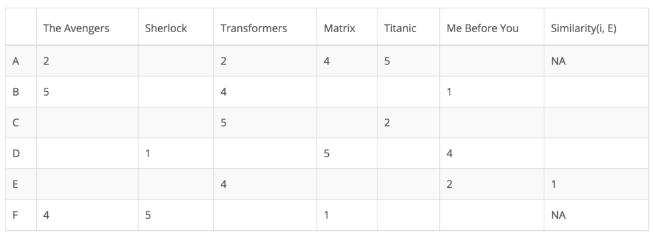

Since users A and F don't share any movie ratings common with the user E, their similarities with the user E can not be defined using Pearson Correlation. Therefore, we only need to consider users B, C, and D. Based on Pearson Correlation, we cna compute the following similarity:
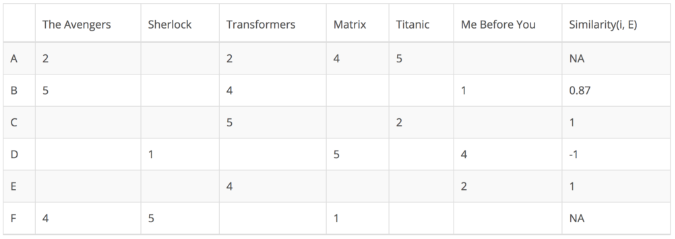

It can be clearly observed that user D is very different from user E, and they also rated the movie "Me Before You" higher than their average movie rating, while user E did the opposite. 
Now we can start to fill in the blank for the movies that user E has not rated based on other users.
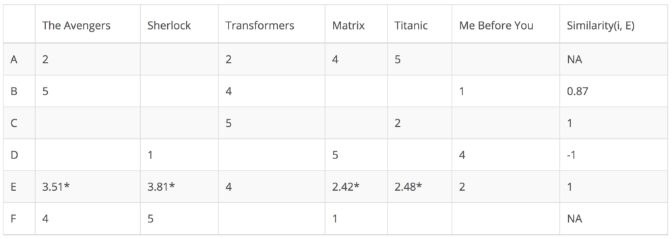

##### NOTE: CF = Collaborative Filtering

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users' preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF. 

### Item Based Collaborative filtering: 
Instead of measuring and computing the similarity between different users, item based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. 

The major difference here is that instead of filling the blank fields horizontally, we cna fill them vertically using the item based filtering technique. The following table shows how that can be done for the movie "Me Before You":
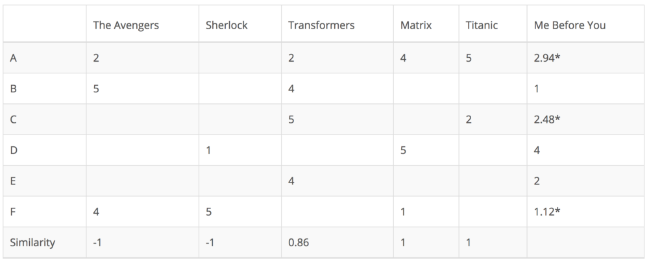

It successfully avoids the problem posed by "dynamic" user preference as item-based CF is more static. However, several problems still remain for this method. 

First, the main issue is *scalability*. The computation grows with both the customer and the product. The worst case complexity is O (mn) with m users and n items. In addition, *sparsity* is another concern. Take a look at the above table again. Although there is only one user that rated both "Matrix" and "The Titanic", the similarity between them is 1. 

In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both. 

### Single Value Decomposition - SVD
One way to handle the scalability and sparsity issue created by CF is to leverage a *latent factor model* to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an *optimization problem*. We can view it as how good we are in predicting the rating for items givne a user. One common metric is Root Mean Squared Error (RMSE). *The lower the RMSE, the better the performance*.

What is latent factor model? It is a broad idea that describes a property or concept that a user or an item have for. For instance, for music, latent factor model can refer to the genre that the music belongs to. SVD decreases the dimensions of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea: 
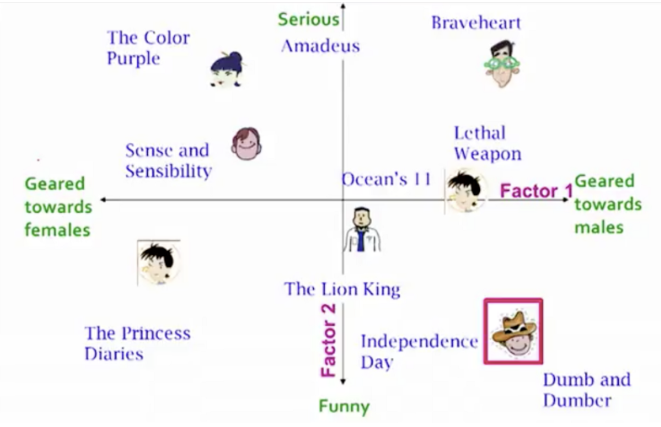

Let's then put this into practice. Since the dataset we used earlier did not have a userID (which is necessary for collaborative filtering), let's load another dataset. 

We'll be using the *surprise* library to implement SVD.

In [45]:
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate #evaluate was depreciated from the surprise library
from surprise.model_selection import KFold

reader = Reader()
ratings = pd.read_csv("/Users/chintanvaghela/Desktop/Data Science/Python/Movie Recommender System/Movies ds/ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


NOTE: In this dataset, the movies are rated on a scale of 5 unlike the earlier one.

In [46]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x7fd4fd29af90>

In [47]:
svd = SVD()
cross_validate(svd, data, measures=["RMSE", "MAE"])

{'test_rmse': array([0.90398799, 0.89864074, 0.89568868, 0.8940092 , 0.88964661]),
 'test_mae': array([0.69535493, 0.69168702, 0.68958538, 0.68717412, 0.68361992]),
 'fit_time': (4.512682914733887,
  4.604270935058594,
  4.570449113845825,
  4.533822059631348,
  4.524379253387451),
 'test_time': (0.11023211479187012,
  0.10463976860046387,
  0.22069191932678223,
  0.10359716415405273,
  0.10512399673461914)}

We get a mean RMSE of 0.89 approx which is more than good in this case. 
We will now train our dataset and come to predictions.

In [48]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Now, let's pick the user with userId 1 and check for the ratings they have given.

In [49]:
ratings[ratings["userId"] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [50]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7873992030270127, details={'was_impossible': False})

for movie with ID 302, we get an estimated prediction of *2.78*. One starting feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have rated the movie.

# Conclusion

We can create recommender systems using demographic, content-based and collaborative filtering. While demographic filtering is very elementary and can't be used practically, *Hybrid Systems* can take advantage of content-based and collaborative filtering as the two approaches are prived to be almost complimentary. 